# Fitting Models to Data: Star Cluster Case Study

*Author: Aaron Geller* <br/> *June 2015, updated in 2017 and 2018*

In this workshop, we will explore data on the Milky Way star clusters, and focus on one particular cluster: [M67](https://en.wikipedia.org/wiki/Messier_67).  We will then use isochrones to estimate the age of the M67.

## Step 1, Warm-Up : Where are our Milky Way's Star Clusters?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Potw1452a.tif/lossy-page1-911px-Potw1452a.tif.jpg" width=600>
(NGC 6535)

Let's first visualize where Globular Clusters (GCs) and Open Clusters (OCs) are located in our Milky Way Galaxy. <br>

[Globular Clusters](https://en.wikipedia.org/wiki/Globular_cluster) are gravitationally bound clusters of 100,000s of stars. Because they formed early in the formation of our Milky Way Galaxy, <a href="http://starchild.gsfc.nasa.gov/docs/StarChild/questions/question28.html">Globular Clusters are used to provide a lower limit on the age of our Universe</a>. 

<a href="https://en.wikipedia.org/wiki/Open_cluster">Open Clusters</a>  contain many fewer stars than globular clusters, usually 100s - 1000s.  They are constantly forming (and evaporating) in our Galaxy, and therefore have a range in ages. 

Later in this activity you'll determine the age of a cluster of your choice. 

First we'll investigate the spatial distribution of these star clusters using the data sets : <a href="data/GlobularClusters_clean.tab">GlobularClusters_clean.tab</a> and <a href="data/OpenClusters_clean.tab">OpenClusters_clean.tab</a>, in your data folder. 

(The GC table is a cleaned up version of the <a href="http://spider.seds.org/spider/MWGC/mwgc.html">original data table from SEDs</a>, and the OC table is a cleaned up version of <a href="https://webda.physics.muni.cz/tadross.html">this one</a>.)

Both tables contain the [RA](https://en.wikipedia.org/wiki/Right_ascension) and [Dec](https://en.wikipedia.org/wiki/Declination) location, distance from our Sun and from the galactic center in kilolightyears (kly), [apparent magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) in the V-band, and [angular size](https://en.wikipedia.org/wiki/Angular_diameter) of the cluster.

### Import python libraries

In [1]:
#Set up astropy 
from astropy.table import Table,Column
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u
from astropy.io import ascii

#Set up plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Read datafiles using [astropy.io.ascii.read](http://docs.astropy.org/en/stable/io/ascii/).

In [2]:
#for the globular cluster data in data/GlobularClusters_clean.tab
GCs = ascii.read('data/GlobularClusters_clean.tab')
GCs.colnames

['name',
 'RA',
 'DEC',
 'distSun(kly)',
 'distGalCenter(kly)',
 'm_v',
 'angular_diameter']

In [3]:
#Now the open cluster data in data/OpenClusters_clean.tab
OCs = ascii.read('data/OpenClusters_clean.tab')
OCs.colnames

['name',
 'RA',
 'DEC',
 'distSun(kly)',
 'distGalCenter(kly)',
 'm_v',
 'angular_diameter']

### Make a simple scatter plot of the Globular and Open Clusters' RA and Dec. 

* For suggestions, look back at our earlier workshops.
* For additional information/examples, check out <a href="http://nbviewer.ipython.org/github/AJRenold/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb">this useful reference</a> and <a href="https://matplotlib.org/tutorials/introductory/pyplot.html">this one</a>.
* be sure to label the plot and include a legend (and give the GCs and Ocs different colors)

Text(0, 0.5, 'Dec')

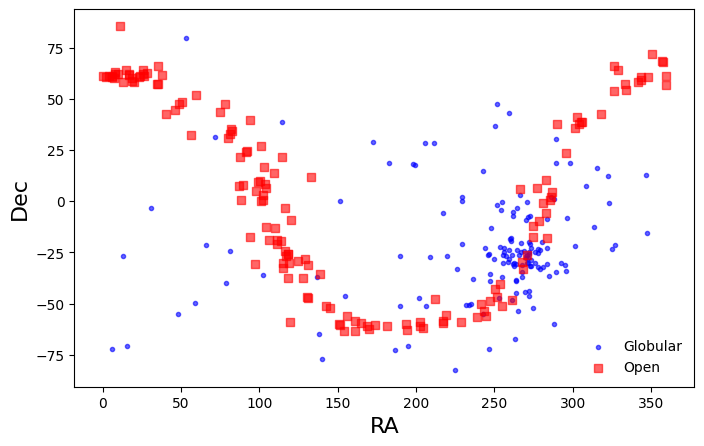

In [4]:
f,ax = plt.subplots(figsize=(8,5), dpi=100)

ax.scatter(GCs['RA'], GCs['DEC'], color='b', marker='.', alpha=0.6, label='Globular')
ax.scatter(OCs['RA'], OCs['DEC'], color='r', marker=',', alpha=0.6, label='Open')
ax.legend(frameon=False)
ax.set_xlabel("RA", fontsize=16)
ax.set_ylabel("Dec", fontsize=16)

### Plot a More Useful Projection 

*Including the distances and diameters of the star clusters*

To locate an object in 3D space we use three numbers. Our data table provides RA, Dec, and distSun. RA and Dec tell us the star clusters' locations on the sky, and distSun tells us their distances from our Sun.  

First, it is useful to create an Astropy Coordinate Object:

In [5]:
# Here is how you use SkyCoord to convert coordinate systems (the 3.26 is to convert from kly to kpc)
GC_Coords=SkyCoord(GCs['RA'],GCs['DEC'],unit=(u.degree, u.degree),\
                   distance=Distance(GCs['distSun(kly)']/3.26,u.kpc),frame='icrs')
# Conver the OC coordinates in the same way
OC_Coords=SkyCoord(OCs['RA'],OCs['DEC'],unit=(u.degree, u.degree),\
                   distance=Distance(OCs['distSun(kly)']/3.26,u.kpc),frame='icrs')

Next, plot the star clusters on the sky in the <a href='http://en.wikipedia.org/wiki/Mollweide_projection'>Mollweide projection</a>. 

* Scale the point sizes according to the angular diameter (i.e., size of the star cluster on the sky)
* and color them according to distance (with the "cool" color table, blue is close and pink is far).

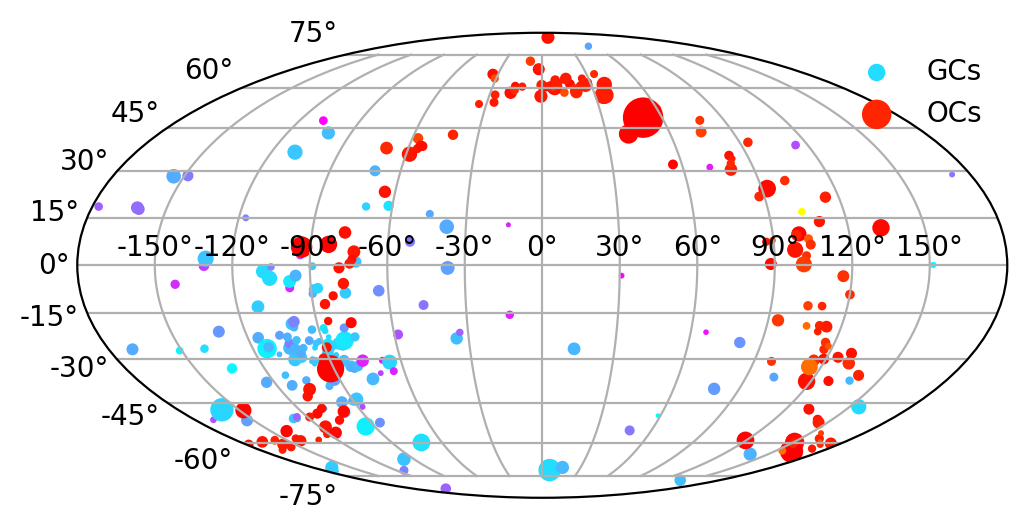

In [6]:
#Create your plot
f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, dpi=200)
plt.grid(True)

#GCs

ax.scatter(GC_Coords.ra.wrap_at(180.*u.degree).radian,GC_Coords.dec.radian,
           c=GC_Coords.distance, s=GCs['angular_diameter'], cmap='cool', label='GCs')

#OCs, plot using the "autumn" color map
ax.scatter(OC_Coords.ra.wrap_at(180.*u.degree).radian,OC_Coords.dec.radian,
           c=OC_Coords.distance, s=OCs['angular_diameter'], cmap='autumn', label='OCs')

#Label your plot
ax.legend(frameon=False)
plt.show()

Questions:

- Considering the GCs, why are the biggest points mostly light blue and the pink points all small?
    
- Why are the are the GCs centered/clumped around a particulat RA/Dec? 



### Plot the Clusters in Galactic Coordinates

Here we'll make the same plot but transformed to Galactic Coordinates $(l,b)$. In Galactic coordinates the center of the Galaxy is at $(0.0,0.0)$.

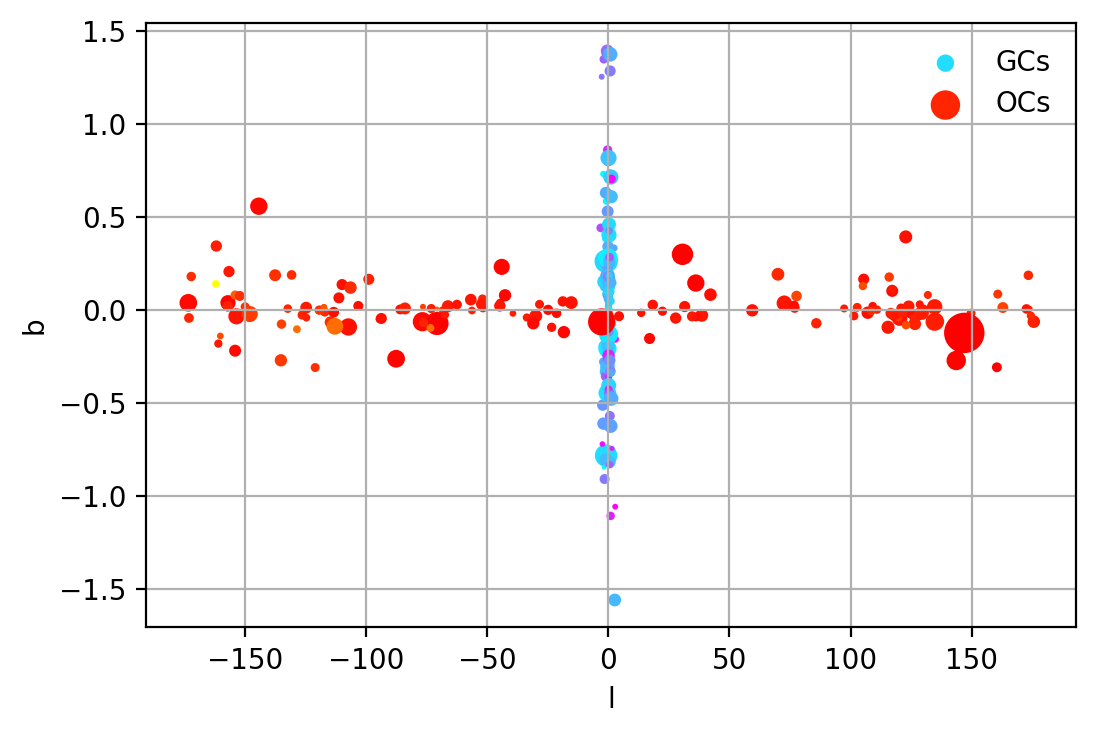

In [7]:
# You can use the existing SkyCoord object to convert between coordinate systems by using, e.g.,
# GC_Coords.galactic.l instead of GC_Coords.ra

#Create your plot.  This will be nearly identical to above, except here you want to plot (l,b), rather than (RA,Dec)

f, ax = plt.subplots(dpi=200)
plt.grid(True)

#GCs
ax.scatter(GC_Coords.galactic.l.wrap_at(180*u.degree).radian,GC_Coords.galactic.b.radian,
           c=GC_Coords.distance, s=GCs['angular_diameter'], cmap='cool', label='GCs')

#OCs, plot using the "autumn" color map
ax.scatter(OC_Coords.galactic.l.wrap_at(180*u.degree),OC_Coords.galactic.b.radian,
           c=OC_Coords.distance, s=OCs['angular_diameter'], cmap='autumn', label='OCs')

#Label your plot
ax.set_xlabel('l')
ax.set_ylabel('b')
ax.legend(frameon=False)
plt.show()

Questions:

- Why do the OCs all live in roughly the same line in this projection, at b=0?    

- Why to the GC and OCs have different spatial distributions in our Galaxy? 
    
In this projection, you can see why the GCs were important to the historic <a href="http://apod.nasa.gov/htmltest/gifcity/cs_why.html"> "Great Debate"</a> between Shapley and Curtis in the early 1900s, about the size of the Universe and our place within it.


# Step 2: Determining the Age of the Open Star Cluster M67

### Part A.  Plot the Observed Color Magnitude Diagram for your Star Cluster

Astronomers <a href="https://www.e-education.psu.edu/astro801/content/l7_p6.html">determine star cluster ages by finding the isochrone that best matches the observed star cluster data</a>.

We will use the M67 data in your 'data' folder that I grabbed from the internet (but there is an extension activity below where you can grab your own data on a different open cluster).
* <a href="data/m67.tab">m67.tab</a>, the observed data
* <a href="data/m67_isochrones.dat">m67_isochrones.dat</a>, a table of isochrones.

### First, let's look at the observations. Read in your Observed Data Table

In [8]:
# Here we read in the M67 Observed Data Table from data/m67.tab using ascii (as above)

obs_data = ascii.read('data/m67.tab', delimiter='\t')
obs_data#.colnames

No,Ref,V,B-V,U-B,N
int64,int64,float64,float64,float64,int64
1,1367,13.59,0.57,0.06,2
3,1367,12.89,0.54,0.08,2
4,1367,12.77,0.95,0.69,1
5,1367,13.05,0.6,0.07,1
6,1367,12.82,0.55,0.03,1
7,1367,14.05,0.61,0.11,2
9,1367,13.45,0.56,0.07,2
11,1367,13.62,0.66,0.09,1
13,1367,14.29,0.62,0.07,1


### Plot the Color Magnitude Diagram for your Star Cluster

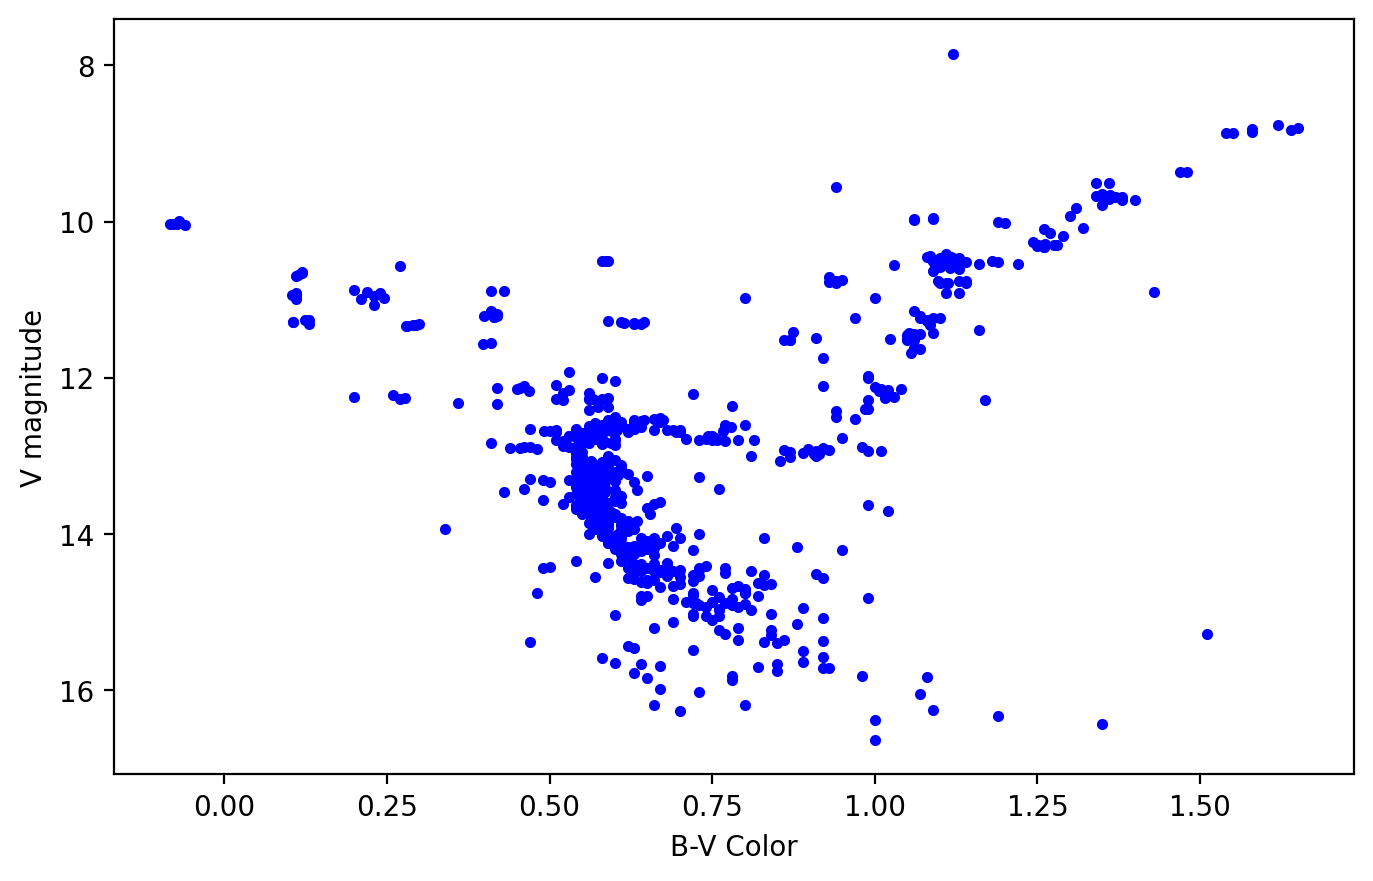

In [9]:
#Plot B-V color on the x-axis and apparent V magnitude on the y-axis

#Label your Plot
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=200)

ax.scatter(obs_data['B-V'], obs_data['V'], color='b', marker='.')
ax.set_xlabel('B-V Color')
ax.set_ylabel('V magnitude')

#Note: color-magnitude diagrams flip the y-axis because the larger a star's V-mag, the fainter the star
ax.invert_yaxis()
plt.show()

### Part B. Now, let's look at the isochrones. 


### Read in your Isochrones Data Table

In [10]:
#Here we read in the M67 Isochrones Data Table from data/m67_isochrones.dat, using ascii

iso_data = ascii.read('data/m67_isochrones.dat')
print(iso_data.colnames)

# Print the ages of your isochrone models
# Unique allows you to pick out just the unique values in an array
ages = np.unique(iso_data['log(age/yr)'])
#print(ages)

['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 'mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'int_IMF', 'stage']


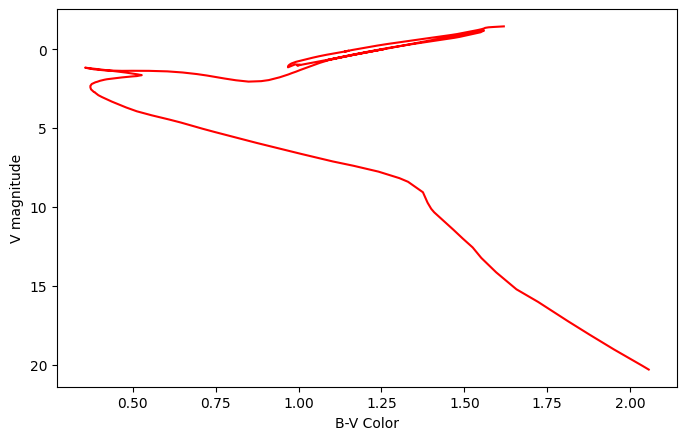

In [11]:
#let's pick an age and plot one of these isochrones to see what it looks like

# Plot the isochrone model at a chosen age in B,V (like the observed data), 
# use numpy.where to select an age
age_ids = np.where(iso_data['log(age/yr)'] == 9.2)[0]

fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
# To plot the B-V color, simply subtract iso_data['V'] fromm iso_data['B'] at your age IDs
# Since isochrons are many data points for each model, plot them as a line rather than scattered points
ax.plot(iso_data['B'][age_ids]-iso_data['V'][age_ids], iso_data['V'][age_ids], color='r')
#Label the Plot
ax.set_xlabel('B-V Color')
ax.set_ylabel('V magnitude')
# Don't forget to invert the y-axis
ax.invert_yaxis()
plt.show()

### Convert the Isochrone Data to Match Observed Data Units

Notice that the isochrone and observations cover very different "x" and "y" regions on the plots we made above.  This is because the isochrone modeled outputs Absolute Magnitudes, without interstellar redenning and at a distance of zero.  <br/>

Of course in reality there is dust between us and the cluster, so we need to add redenning to the isochrone.  Also the real cluster is far away, so the stars are fainter; we add the "distance modulus" to shift the isochrone. <br/>

Now, convert your isochrones' absolute magnitudes into apparent magnitudes. 


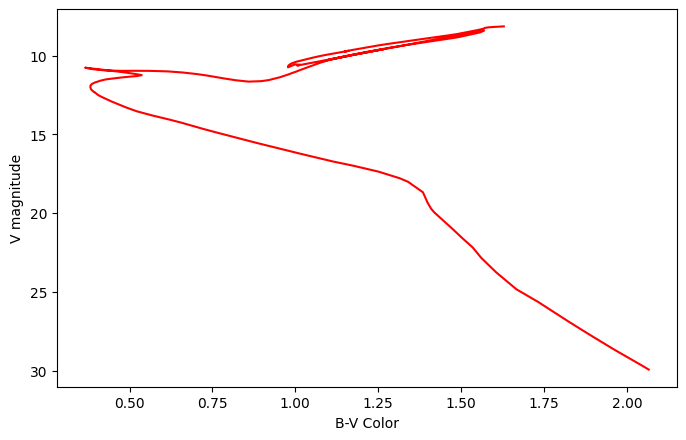

In [12]:
#the M67 physical constants are listed here.
reddening = 0.01
distMod = 9.6

#apparent V magnitude
iso_V = iso_data['V'] +  distMod

#observed B-V color 
iso_BminV = iso_data['B'] - iso_data['V'] + reddening

# Repeat the above plotting for a single chosen age, but now using the apparent and reddened values,
# to see the difference of turning our model values from absolutes to observed data
age_ids = np.where(iso_data['log(age/yr)'] == 9.2)[0]
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
ax.plot(iso_BminV[age_ids], iso_V[age_ids], color='r')
ax.set_xlabel('B-V Color')
ax.set_ylabel('V magnitude')
ax.invert_yaxis()
plt.show()

### Part C. Overplot the Isochrone and Observations on a Color-Magnitude Diagram


### Plot the Observed Data and Isochrone Data Together

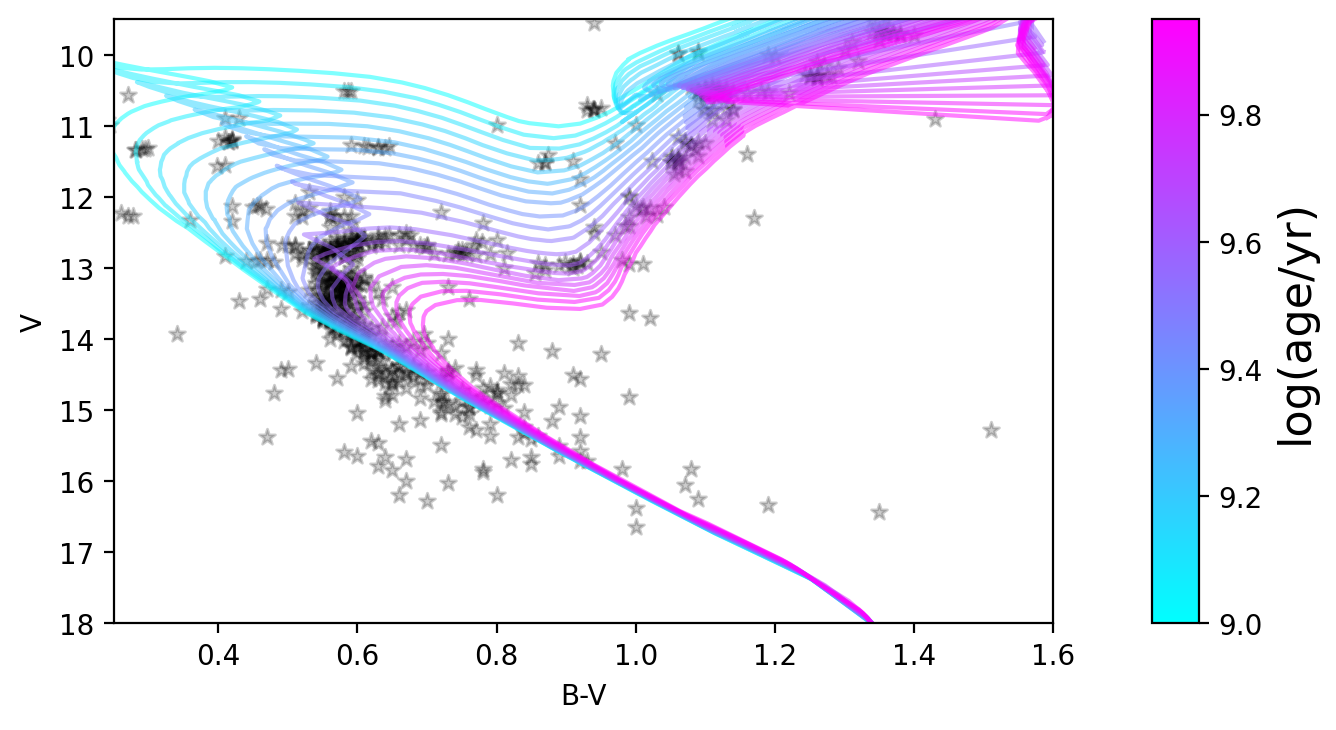

In [13]:
#Set up the plot, and make an extra axis to hold the colormap
f, (ax, cax) = plt.subplots(1,2, figsize=(7,4), gridspec_kw={'width_ratios':[1, 0.05]}, dpi=200)

# Plot the observed data
ax.scatter(obs_data['B-V'], obs_data['V'], color='k', marker='*', alpha=0.2)

# Plot the isochrone models:
# first set the colors (feel free to choose a different color scheme)
cmap = matplotlib.cm.cool

# write a for loop that goes through each age and plots that isochrone on the same axis (ax) 
# whith a color chosen from the cmap
j=0.0
for i in range(len(ages)):
    ids = np.where(iso_data['log(age/yr)'] == ages[i])[0]
    # Note that ax.plot takes the argument 'color', not 'cmap'
    # Cycle through the color map colors using an value (e.g. cmap(value)) 
    # that ranges from 0 to 1, increasing for each age
    ax.plot(iso_BminV[ids], iso_V[ids], color=cmap(j), marker='', alpha=0.5)
    j += 0.055

#add the colorbar
norm = matplotlib.colors.Normalize(vmin=min(ages), vmax=max(ages))
cb1 = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
cax.set_ylabel('log(age/yr)',fontsize=16)

#Label the Plot
ax.set_xlabel('B-V')
ax.set_ylabel('V')
# I suggest limiting the y-range manually to not only be inverted 
# but also to look at values closer to just the observed data
ax.set_ylim(18, 9.5)#ax.set_ylim(18.8, 7.8)
ax.set_xlim(0.25, 1.6)
plt.show()


### Which of your isochrone models (which age) looks to be the best-fit with your star cluster's observed data? 

In general, you could determine the redenning, distance modulus, and cluster age (and metallicity) from fitting an isochrone to the observations.  Let's assume here that we know everything but the cluster age (e.g., from different observations), and we just want to find the cluster age here.

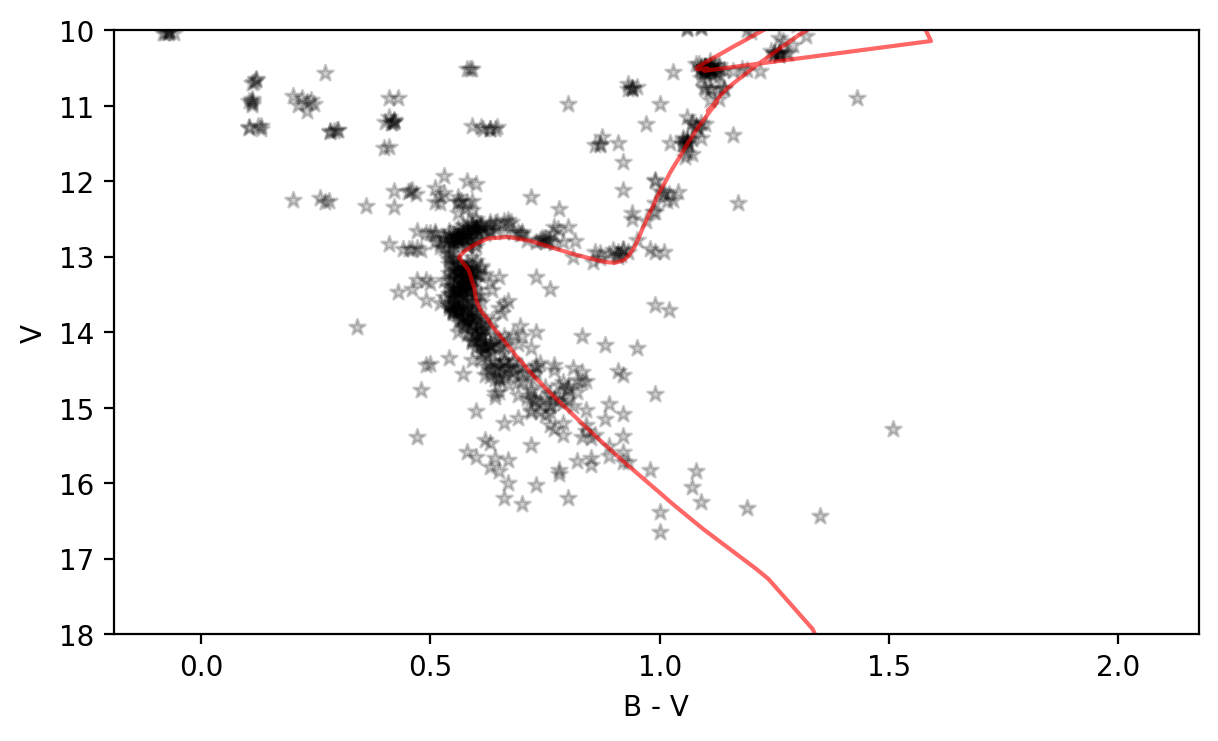

In [14]:
#Plot the best fit by eye over the data 
f, ax = plt.subplots(1,1, figsize=(7,4), dpi=200)
# Plot the observed data
ax.scatter(obs_data['B-V'], obs_data['V'], color='k', marker='*', alpha=0.2)

# Plot your best fit (by eye) isochrone model
ids = np.where(iso_data['log(age/yr)'] == ages[13])
ax.plot(iso_BminV[ids], iso_V[ids], 'r', alpha=0.6)

#Label the Plot
#ax.invert_yaxis()
ax.set_xlabel('B - V')
ax.set_ylabel('V')
ax.set_ylim(18, 10)
plt.show()

This "chi-by-eye" may work fairly well, but remember, we already knew the redenning and distance modulus.  And also what about the uncertainties on our age fit by eye?  And what would we do if we wanted to fit isochrones to hundreds of clusters?

## Part C. Parameter Estimation: Automating the Fit

## In the above, you determined your star cluster's age by eye. Let's automate the process.

We will try to find the isochrone that minimizes the distance that all observed points fall from the isochrone line.  Recall for a more usual type of curve fitting to data (e.g., a straight line), we might try to minimize the <a href="https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test">$\chi^2$ value</a>:

$$ \chi^2 = \Sigma_{i = 1}^{N} \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} $$

We'll do something similar here, but for simplicity only take the numerator in that equation (which assumes that the errors on our observations are all the same).

First, notice that there are many stars away from the predictions of the isochrone.  Some of these are non-members but others are exotic stars (e.g., "blue stragglers", "yellow giants" "sub-subgiants" -- ask Aaron about these :).  However, none of these non-members or exotic stars are modelled by the isocrones, so we should probably not try to fit to them.  Let's cut out some of these bright stars.

In [47]:
#choose some minimum V value to fit to (leave this alone for now, but come back later to refine the fit)
minVfit = 11.5
maxVfit = 17.0
minBVfit = 0.25 #-100.
maxBVfit = 1.5#100.

### Below: Calculate a modified chi^2 value that simply uses the distance of each observation from the isochrone
For each observed point in (BVo, Vo) that is within in the min, max limits (set above), we want to 

1. find the closest isochrone point (with the minimum distance)
2. calculate the distance between those two points 
3. add that to our modified chi^2 value
4. after the loop, you should have an array of modified chi2 values, one for each age

Hint: You will likely want one for-loop to iterate through all the (BVo, Vo) values, and another to iterate through all the isochrone values.

Hint2: for the distance (squared) between points $(y_{i} - f(x_{i}))^2$, you can use a formula of the form: 
$distance^2 = (BVo - BViso)^2 + ((Vo - Viso)/normV)^2$

In [48]:
print('chi^2 per age:')
    
# create and empty list to hold the chi^2 values that we will calculate below
chi2 = []

#a normalization since differences in B-V are much smaller than in V
normV = 10.
obs_ids = np.where((obs_data['V'] < maxVfit) & (obs_data['V'] > minVfit)
                   & (obs_data['B-V'] < maxBVfit) & (obs_data['B-V'] > minBVfit))[0]
BVo, Vo = obs_data['B-V'][obs_ids], obs_data['V'][obs_ids]

#loop through all of the ages and calculate a chi^2 value for each
for t in range(len(ages)):
    #find the isochrone with this log(age/yr) == ages[t] (using numpy.where)
    age_ids = np.where(iso_data['log(age/yr)'] == ages[t])[0]
    chi2_per_obsdatapoint = 0
    for (BV_i,V_i) in zip(BVo, Vo):
        dist = []
        for (iso_BV_j,iso_V_j) in zip(iso_BminV[age_ids], iso_V[age_ids]):
            dist.append((BV_i-iso_BV_j)**2. + ((V_i-iso_V_j)/normV)**2.)
        chi2_per_obsdatapoint += min(dist)
    chi2.append(chi2_per_obsdatapoint)
    print(ages[t], chi2[t])
    

chi^2 per age:
9.0 4.363106849999997
9.05 4.038034369999997
9.1 3.77150222
9.15 3.4719938099999896
9.2 3.1230531599999978
9.25 2.7682082900000022
9.3 2.4402912299999993
9.35 2.10692052
9.4 1.7548899000000024
9.45 1.54371496
9.5 1.4254505500000016
9.55 1.4022985000000001
9.6 1.5596781100000008
9.65 1.9096465800000024
9.7 2.5708619000000006
9.75 3.4466389299999958
9.8 4.386994309999998
9.85 5.676172310000013
9.9 7.266667939999986
9.95 9.220662349999978


In [49]:
# identify the age at the minimum chi^2 value 
# numpy.argmin is a function that gives the index of the value at the minimum value of an array.  
#    Use that here.
pos1 = np.argmin(chi2)

# print the ages at these two different minima values
print(f'best fit log(age/yr): {ages[pos1]}')
print(f'best fit age [Gyr]: {10.**ages[pos1]/1.e9}')


best fit log(age/yr): 9.55
best fit age [Gyr]: 3.5481338923357604


Text(0.5, 0, 'Age of Isochrone Model')

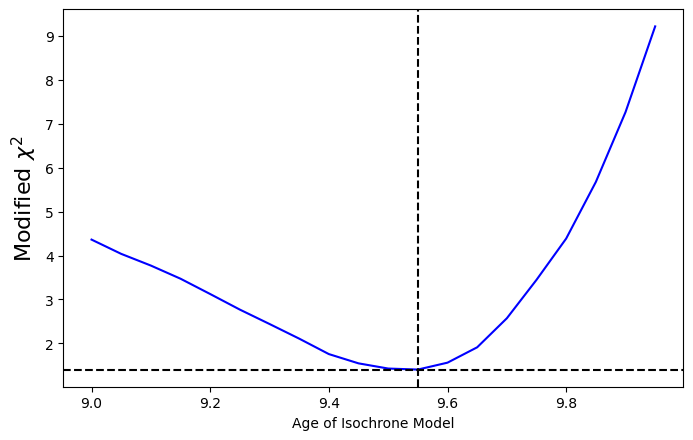

In [50]:
# Plot the chi^2 values vs. age

fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
ax.plot(ages, chi2, 'b')
ax.axhline(min(chi2), color='k', linestyle='--')
ax.axvline(ages[np.argmin(chi2)], color='k', linestyle='--')

#Label the plot
ax.set_ylabel(r'Modified $\chi^2$', fontsize=16) #NOTE: you can use latex syntax to get Greek symbols in plots
ax.set_xlabel(r'Age of Isochrone Model')


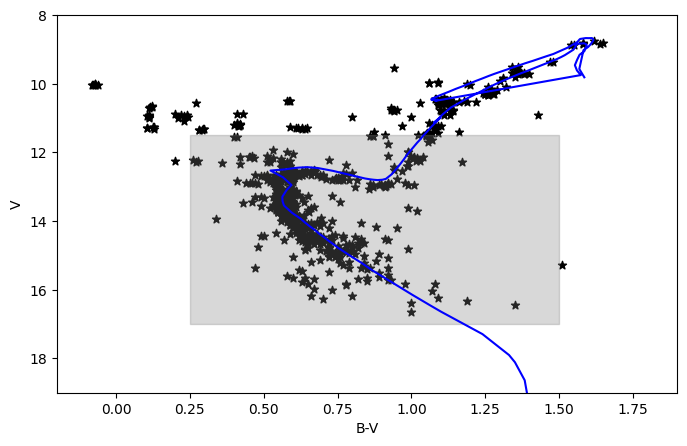

In [51]:
# Plot the best-fit isochorone over the observed data 

fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)

# Plot the observed data
ax.scatter(obs_data['B-V'], obs_data['V'], color='k', marker='*', label='Data')
# Plot the best-fit isochrone
best_age_ids = np.where((iso_data['log(age/yr)'] == ages[np.argmin(chi2)]))[0]
ax.plot(iso_BminV[best_age_ids], iso_V[best_age_ids], color='b', label='Best-Fit Isochrone')
# Label the plot
ax.set_xlabel('B-V')
ax.set_ylabel('V')

# Highlight the region that was included for the fit, and adjust axes lims if needed
ax.fill_between([minBVfit,maxBVfit],[minVfit, minVfit], [maxVfit,maxVfit] ,color='gray', alpha=0.3)
ax.set_xlim(-0.2, 1.9)
ax.set_ylim(19.0, 8.0)
plt.show()

Google the age of your star cluster. How close is your best-fit to your fit by eye (and to the accepted age in the literature)? 

If you're not satisfied with our automated fit, go back and improve the code so that it works more reliably (for instance, modify the V and BV limits we set above)

### Some "food for thought" to think about and discuss:

- What are the limitations to the approach used above? 

     
- Which fit do you trust more, the "chi-by-eye" or our automated fit?


- What other information might you want for each star to improve your fit?


- How can we improve this automated fit with the data that we have?  Give that a try!

 

Remember that star clusters form an import rung on the cosmic distance ladder AND are critical tests for our theory of stellar evolution (which underpins just about all of astrophysics).  So we **REALLY** want to have reliable isochrone fits to observations like these.  <a href="http://arxiv.org/abs/1501.01303"> Some people spend years developing these methods!</a>

# Congratulations! You've completed this workshop!

## Extension Activity: Download your own Data and fit an isochrone!.

## How to Download Observed Star Cluster Data

Go to https://webda.physics.muni.cz/navigation.html

This site allows you to download data from pretty much any open star cluster in our galaxy that might be of interest to you. For the full list of clusters included in this site, click <a href="https://webda.physics.muni.cz/complete_ad.html">here</a>. Pick one that interests you. For additional information about each cluster, look it up in <a href="http://ned.ipac.caltech.edu/forms/byname.html">NED (the NASA Extragalactic Database)</a>.

- Type the name for any star cluster of your choice (for example, M67) in the box labelled 'Display the Page of the Cluster'. Hit enter.
- Make a note of the value for this cluster's ‘Reddening’ and the ‘Distance Modulus’, listed under ‘Basic Parameters’.
- Under ‘Query’, click 'selections on data'.
    - Note: If it doesn't say UBV at the top, then click on 'UBV' (at the left).
- In the 'V' boxes, type 0 in 'Lower' and 20 in 'Upper'. Hit enter.
    - A list of stars and their apparent magnitudes should appear.
- In your data folder in yourProjectDirectory, open a new text file using your favorite text editor.
- Copy your star cluster data into this text file. These (and the isochrone data below) are the data you'll use to determine the age of your star cluster.
- Explore the site. What other data can you download about each cluster (i.e., positions, other filter magnitudes, etc.)?

<a href="https://webda.physics.muni.cz/description.html#base_level">General information about the history and use of WEBDA</a>.

## How to Download the Isochrone Model Data


Next, go to http://stev.oapd.inaf.it/cgi-bin/cmd

- Use the default values under “Evolutionary Tracks”.
- Make sure the photometric system is appropriate for your data (i.e., if you’re using UBV data, then choose the one that starts with UBV).
- Keep the default values for “Dust”,”Extinction”, “Initial Mass Function”
- Under Ages, select a sequence of isochrones of constant metallicity...
    - Change initial and final metallicity to Z=0.019 (this is the value for solar metallicity)
    - Change the age range to log(t/yr) = 8.0 to 10.0  (i.e., ages ranging from 100 million years to 10 billion years)
- Keep the default selection for 'Output' on Isochrone Tables
- Click submit and download the linked file named ‘outputxxx.dat’
- Rename this file to something meaningful and place it in your data folder in yourProjectDirectory.
- Look at the table you generated using your favorite text editor. 
    - Find the rows separating the isochrone of one age from the isochrone of the next age (i.e., log[age/years] = 8 to log[age/years] = 8.5). 
    - Note how this single file contains the full set of isochrones.